In [1]:
import os
import time

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import spacy
from spacy import displacy

import networkx as nx
from pyvis.network import Network


In [2]:
# !python3 -m spacy download en_core_web_sm

## Scrapping the Character Names from the website 

In [3]:
# WEB_DRIVER = './driver/chromedriver'
WEB_DRIVER_PATH = './driver/chrome'

chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--window-size=1920x1080")
# chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--no-sandbox")

In [4]:
driver = webdriver.Chrome(WEB_DRIVER_PATH,  options=chrome_options)
driver.get('https://harrypotter.fandom.com/wiki/Category:Character_indexes')

/tmp/ipykernel_25781/2682596246.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(WEB_DRIVER_PATH,  options=chrome_options)


In [5]:
btn = driver.find_element(By.XPATH, '/html/body/div[7]/div/div/div[2]/div[2]')
btn.click()

In [6]:
list = driver.find_elements(By.CLASS_NAME, 'category-page__member-link')
print(list)

[<selenium.webdriver.remote.webelement.WebElement (session="c3f2c33f65600f3ed620613089168cd3", element="dd96ac26-8a45-4b2e-8202-cff116ea903a")>, <selenium.webdriver.remote.webelement.WebElement (session="c3f2c33f65600f3ed620613089168cd3", element="08d625cd-7db9-4605-91a3-17849a34ac68")>, <selenium.webdriver.remote.webelement.WebElement (session="c3f2c33f65600f3ed620613089168cd3", element="28cb022b-2842-4bf4-bd94-cfbb8abead49")>, <selenium.webdriver.remote.webelement.WebElement (session="c3f2c33f65600f3ed620613089168cd3", element="5b202942-5e50-4322-8e32-f764df068d64")>, <selenium.webdriver.remote.webelement.WebElement (session="c3f2c33f65600f3ed620613089168cd3", element="fdbcb64f-a1de-4c5f-b8a1-46bd677fc041")>, <selenium.webdriver.remote.webelement.WebElement (session="c3f2c33f65600f3ed620613089168cd3", element="d04a5939-6fd2-4f9c-baaf-c0c4d2e255ee")>, <selenium.webdriver.remote.webelement.WebElement (session="c3f2c33f65600f3ed620613089168cd3", element="7d1f05a4-dd13-44df-aef4-ae98372c

In [7]:
books = {}
for i in list:
    books[i.text.split(' (')[0]] = i.get_attribute('href')

books


{'Harry Potter and the Chamber of Secrets': 'https://harrypotter.fandom.com/wiki/Harry_Potter_and_the_Chamber_of_Secrets_(character_index)',
 'Harry Potter and the Deathly Hallows': 'https://harrypotter.fandom.com/wiki/Harry_Potter_and_the_Deathly_Hallows_(character_index)',
 'Harry Potter and the Goblet of Fire': 'https://harrypotter.fandom.com/wiki/Harry_Potter_and_the_Goblet_of_Fire_(character_index)',
 'Harry Potter and the Half-Blood Prince': 'https://harrypotter.fandom.com/wiki/Harry_Potter_and_the_Half-Blood_Prince_(character_index)',
 'Harry Potter and the Order of the Phoenix': 'https://harrypotter.fandom.com/wiki/Harry_Potter_and_the_Order_of_the_Phoenix_(character_index)',
 "Harry Potter and the Philosopher's Stone": 'https://harrypotter.fandom.com/wiki/Harry_Potter_and_the_Philosopher%27s_Stone_(character_index)',
 'Harry Potter and the Prisoner of Azkaban': 'https://harrypotter.fandom.com/wiki/Harry_Potter_and_the_Prisoner_of_Azkaban_(character_index)'}

In [8]:
book_arr = []
character_arr = []
for book in books:
    driver.get(books[book])
    time.sleep(4)
    if "Harry Potter and the Philosopher's Stone" in book or "Harry Potter and the Chamber of Secrets" in book:
        list_character = driver.find_elements(By.XPATH, '//tr')
        print(book)
        print(len(list_character))
        for i in list_character:
            character_arr.append(i.text)
            book_arr.append(book)
    else:
        list_character = driver.find_elements(By.XPATH, '//*[@id="mw-content-text"]/div/ul/li')
        print(book)
        print(len(list_character))
        for i in list_character:
            if 'Harry Potter and the' not in i.text:
                character_arr.append(i.text)
                book_arr.append(book)

Harry Potter and the Chamber of Secrets
69
Harry Potter and the Deathly Hallows
103
Harry Potter and the Goblet of Fire
175
Harry Potter and the Half-Blood Prince
111
Harry Potter and the Order of the Phoenix
151
Harry Potter and the Philosopher's Stone
163
Harry Potter and the Prisoner of Azkaban
60


In [9]:
driver.close()

In [10]:
df = pd.DataFrame({'book': book_arr, 'character': character_arr})

In [11]:
df.head()

,book,character
0,Harry Potter and the Chamber of Secrets,Mr Mason
1,Harry Potter and the Chamber of Secrets,Mrs Mason
2,Harry Potter and the Chamber of Secrets,Dobby
3,Harry Potter and the Chamber of Secrets,Mafalda Hopkirk
4,Harry Potter and the Chamber of Secrets,Errol


## Data Exploration

In [12]:
dv = df.groupby('book').count()

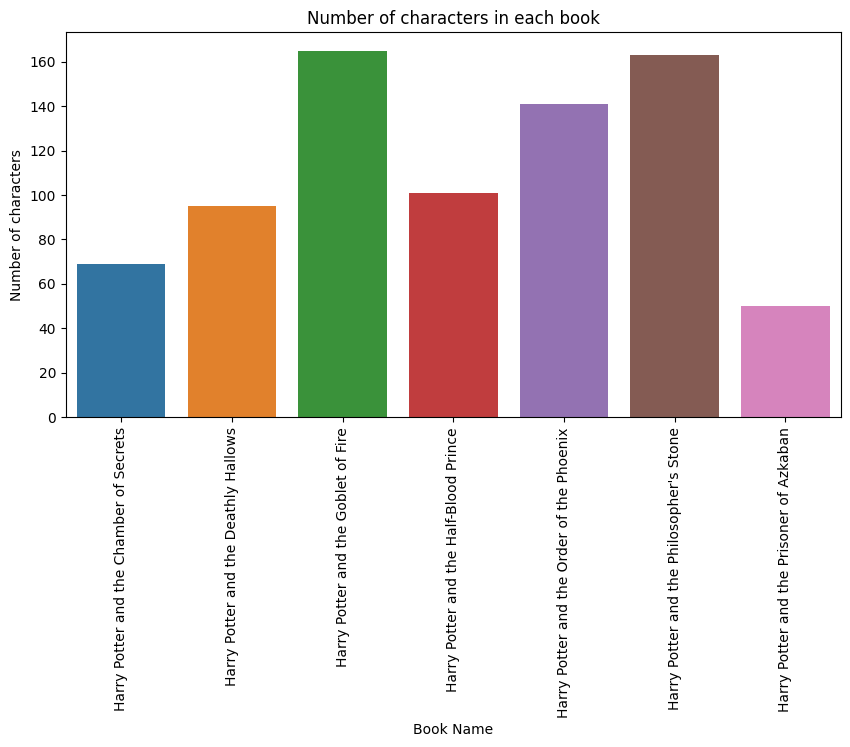

In [13]:
# plot seaborn bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x=dv.index, y=dv['character'])
plt.title('Number of characters in each book')
plt.xlabel('Book Name')
plt.ylabel('Number of characters')
plt.xticks(rotation=90)
plt.show()

## Entity Extraction Book 1

In [14]:
# Spacy english language model
nlp = spacy.load('en_core_web_sm')

In [15]:
books = [i for i in os.scandir('./book/')]
books

[<DirEntry "Book 1 - The Philosopher's Stone.txt">,
 <DirEntry 'Book 2 - The Chamber of Secrets.txt'>,
 <DirEntry 'Book 5 - The Order of the Phoenix.txt'>,
 <DirEntry 'Book 3 - The Prisoner of Azkaban.txt'>,
 <DirEntry 'Book 6 - The Half Blood Prince.txt'>,
 <DirEntry 'Book 4 - The Goblet of Fire.txt'>,
 <DirEntry 'Book 7 - The Deathly Hallows.txt'>]

In [16]:
book = books[0]
book_text = open(book, 'r').read()
book_doc = nlp(book_text)

In [17]:
displacy.render(book_doc[:100], style='ent', jupyter=True)

In [18]:
book1_df = df[df['book']=="Harry Potter and the Philosopher's Stone"]
book1_df.reset_index(drop=True, inplace=True)
book1_df.head()

,book,character
0,Harry Potter and the Philosopher's Stone,Vernon Dursley
1,Harry Potter and the Philosopher's Stone,Petunia Dursley
2,Harry Potter and the Philosopher's Stone,Dudley Dursley
3,Harry Potter and the Philosopher's Stone,Lily Potter
4,Harry Potter and the Philosopher's Stone,James Potter


In [19]:
book1_df.loc[:, 'first_name'] = book1_df['character'].apply(lambda x: x.split(' ')[0])

/tmp/ipykernel_25781/3222630064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book1_df.loc[:, 'first_name'] = book1_df['character'].apply(lambda x: x.split(' ')[0])


In [20]:
book1_df.head()

,book,character,first_name
0,Harry Potter and the Philosopher's Stone,Vernon Dursley,Vernon
1,Harry Potter and the Philosopher's Stone,Petunia Dursley,Petunia
2,Harry Potter and the Philosopher's Stone,Dudley Dursley,Dudley
3,Harry Potter and the Philosopher's Stone,Lily Potter,Lily
4,Harry Potter and the Philosopher's Stone,James Potter,James


In [21]:
sentences = {'sentence': [], 'entity': []}
for sent in book_doc.sents:
    sent_ent = [ent.text for ent in sent.ents]
    sentences['sentence'].append(sent)
    sentences['entity'].append(sent_ent)

sentences_df = pd.DataFrame(sentences)


In [22]:
sentences_df.head()

,sentence,entity
0,"(/, \n\n\n\n\n, THE, BOY, WHO, LIVED, \n\n, Mr...","[LIVED, Dursley, number four, Privet Drive]"
1,"(They, were, the, last, people, you, ’d, \n, e...",[]
2,"(Mr., Dursley, was, the, director, of, a, firm...","[Dursley, Grunnings]"
3,"(He, was, a, big, ,, beefy, \n, man, with, har...",[]
4,"(Mrs., Dursley, was, thin, and, \n, blonde, an...",[Dursley]


In [23]:
# filter entity containg character name
sentences_df['entity'] = sentences_df['entity'].apply(lambda x: [i for i in x if i in book1_df['character'].values or i in book1_df['first_name'].values])

In [24]:
sentences_df_filtered = sentences_df[sentences_df['entity'].apply(lambda x: len(x) > 0)]

In [25]:
# take only the first name entity
sentences_df_filtered['entity'] = sentences_df_filtered['entity'].apply(lambda x: [i.split(' ')[0] for i in x])

/tmp/ipykernel_25781/937940844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentences_df_filtered['entity'] = sentences_df_filtered['entity'].apply(lambda x: [i.split(' ')[0] for i in x])


In [26]:
sentences_df_filtered.reset_index(drop=True, inplace=True)

In [27]:
window_size = 5
relationships = []
for i in range(len(sentences_df_filtered)):
    end_val = min(i + window_size, len(sentences_df_filtered))
    temp = sentences_df_filtered.loc[i:end_val,'entity'].sum()
    # getting unique values
    temp_unique = [temp[i] for i in range(len(temp)) if i==0 or temp[i] != temp[i-1]]
    
    if len(temp_unique) > 1:
        for j, a in enumerate(temp_unique[:-1]):
            b = temp_unique[j+1]
            relationships.append({'source': a, 'target': b})
            

In [28]:
relationships_df = pd.DataFrame(relationships)
relationships_df.head()

,source,target
0,Dudley,Harry
1,Harry,Dudley
2,Dudley,Harry
3,Harry,Dudley
4,Dudley,Harry


In [29]:
relationships_df = pd.DataFrame(np.sort(relationships_df.values, axis=1), columns=relationships_df.columns)

In [30]:
relationships_df['value'] = 1
relationships_df = relationships_df.groupby(['source', 'target'], sort=False, as_index=False).sum()

## Creating the Network

In [31]:
G = nx.from_pandas_edgelist(relationships_df, 'source', 'target', 'value', create_using=nx.Graph())

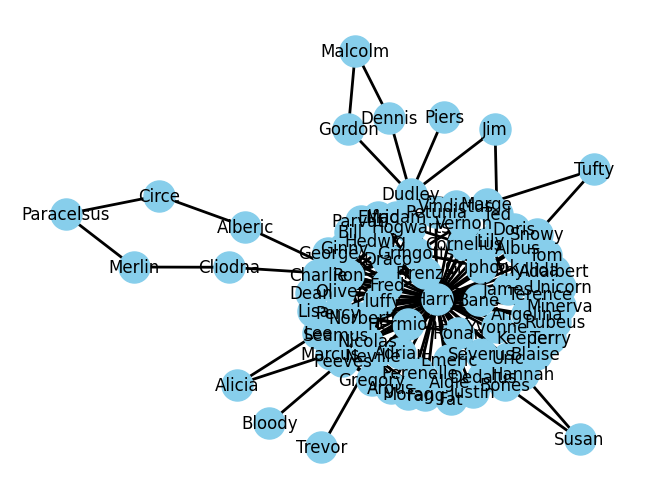

In [32]:
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=500, edge_cmap=plt.cm.Blues, width=2)
plt.show()

In [33]:
net = Network(notebook=True, height='750px', width='100%', bgcolor='#222222', font_color='white')
net.from_nx(G)
net.show('HP1.html')

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 
